## Computer Vision

In [9]:
import demo_functions as df

## Detection with colors
The detection of the robot was done using color detection. Two distincts colors dots are put on the Thymio in order to compute easily the position and the orientation at any visible time.

The image is first converted in HSV space in order to easily isolate one color. A mask is then created by keeping only the colors in a close range arround the targeted color. This mask is then dilated and eroded in order to reduce the noise and the minimal enclosing circle around the resluting mask is computed. The position of the front and the back of the robot is extracted using this techinque two times and the center of the robot and the angle are then retrieved.

The main advantage is that this technique is realy fast because it is not hard to process and allow us to have a high frame rate and thus a very responsive tracking of the robot, this is why it was chosen to track the Thymio.
However this technique works only on a controlled environment where no other color interfere with the detection.

### Apply tracker on the video

In [10]:
df.apply_tracker_on_vid("report_images/video_thymio_demo_no_obstacle.mp4",
                        "report_images/data_demo_detection.txt")

100%|████████████████████████████████████████████████████████████████████████████████| 279/279 [00:07<00:00, 37.34it/s]


interactive(children=(IntSlider(value=139, description='i', max=278), Output()), _dom_classes=('widget-interac…

## Detection of the goal
Template matching was used in order to find the position of the goal. A template of the desired object is save during the initialiyation of the setup. This template is then used whit the correlation coefficient normed technique in order to retrieve the position on the map that correspond to the template. The correlation coefficient normed is defined as :

R(x,y) = ∑x′,y′(T(x′,y′)⋅I(x+x′,y+y′))/(∑x′,y′T(x′,y′)2⋅∑x′,y′I(x+x′,y+y′)2)^1/2

The maximum correlation point is then extracted.
The main advantage of using this technique was to be able to take anything that we want for the goal.
Some disadvantages are the fact that the matching is orientation dependent and slower than a color detection, therefore it was used only at the begining of the run, before the computing of the path in order to retrieve the goal.

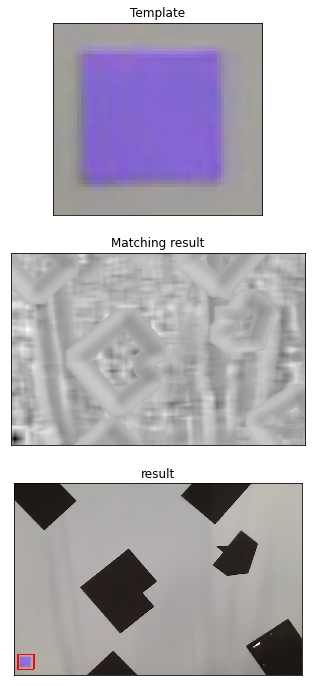

In [11]:
df.find_template_demo("report_images/GoalTemplate_demo.png",
                      "report_images/map_without_thymio_demo.png")

## Extended Kalman filter
An extended kalman filter was used in order to filter the position, the speed and the orientation of the robot. This filter can be used because we can suppose that the variance and covariance of the diferent parameters mentioned above are Gaussian. This filter was adapted in order to be able to update the different parameter in diffenrent situation. 
If the robot is visible the update step can be done using the position and orientation retrived by the camera and the lineare and rotational speed comunicated by the robot. If the camera is obstructed or the robot out of sight, the update step can be done using only the lineare and rotational speed pf the robot.
This choice was made in order to be able to run a small amount of time with no camera but still managing a good prediction of the position.
The covariance of the mesure and prediction were evaluated then tested and tuned by iteration in order to obtain the best possible results.
The choice of an extended Kalman filter was slightly more difficult to implement than a simple Kalman filter but was interesting from an educational point of view and shows very good results.
All the parameters of variance of the measure and estimation were approximated and then tuned by several iterations to get the best results.

### Apply Kalman filter on the video, with and without position measurement

In [12]:
measures, state, state_no_cam = df.kalman_filter_demo("report_images/video_thymio_demo_no_obstacle.mp4", 
                      "report_images/data_demo_detection.txt", 
                      "report_images/recorded_speed_demo.txt")

100%|████████████████████████████████████████████████████████████████████████████████| 279/279 [00:06<00:00, 41.51it/s]


interactive(children=(IntSlider(value=139, description='i', max=278), Output()), _dom_classes=('widget-interac…

Results for the position parameters with the measures on the cam and the speed of the robot

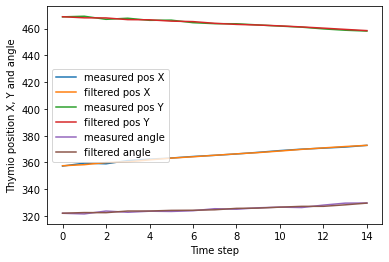

In [13]:
df.plot_position(60, 75, measures, state)

Results for the speed of the robots with the measures on the cam and the speed of the robot

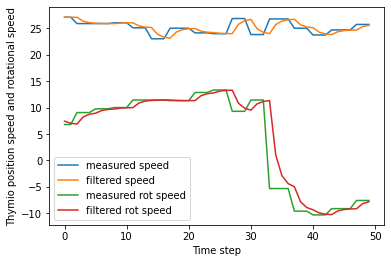

In [14]:
df.plot_speed(100, 150, measures, state)